In [1]:
# Loading the dataset
# Import pandas library
import pandas as pd
# Import numpy
import numpy as np
# Reading the dataset
mydata = pd.read_csv("FPD-area-radiusandulna-aim.csv")

In [2]:
mydata.head()

,URN,R_area,U_area,AIM
0,FL008_PD_001,0.0,0.0,309
1,FL008_PD_002,0.0,0.0,309
2,FL008_PD_003,0.0,0.0,309
3,FL008_PD_004,0.0,0.0,309
4,FL008_PD_005,0.0,0.0,309


In [3]:
mydata.describe()

,R_area,U_area,AIM
count,1543.000000,1543.000000,1543.000000
mean,75.204326,26.823137,235.368114
std,134.032397,63.377175,53.741738
min,0.000000,0.000000,125.000000
25%,0.000000,0.000000,188.000000
50%,0.000000,0.000000,237.000000
75%,90.062500,0.000000,283.000000
max,702.750000,410.625000,323.000000


In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   URN     1543 non-null   object 
 1   R_area  1543 non-null   float64
 2   U_area  1543 non-null   float64
 3   AIM     1543 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 48.3+ KB


In [5]:
X = mydata.drop(['URN', 'AIM'], axis = 1)
print(X)

      R_area  U_area
0        0.0     0.0
1        0.0     0.0
2        0.0     0.0
3        0.0     0.0
4        0.0     0.0
...      ...     ...
1538     0.0     0.0
1539     0.0     0.0
1540     0.0     0.0
1541     0.0     0.0
1542     0.0     0.0

[1543 rows x 2 columns]


In [6]:
y = mydata['AIM']
print(y)

0       309
1       309
2       309
3       309
4       309
       ... 
1538    209
1539    209
1540    209
1541    209
1542    209
Name: AIM, Length: 1543, dtype: int64


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

# Splitting the dataset in train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1080, 2) (463, 2) (1080,) (463,)


In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080 entries, 720 to 684
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R_area  1080 non-null   float64
 1   U_area  1080 non-null   float64
dtypes: float64(2)
memory usage: 25.3 KB


In [9]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 1080 entries, 720 to 684
Series name: AIM
Non-Null Count  Dtype
--------------  -----
1080 non-null   int64
dtypes: int64(1)
memory usage: 16.9 KB


In [10]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 1041 to 634
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R_area  463 non-null    float64
 1   U_area  463 non-null    float64
dtypes: float64(2)
memory usage: 10.9 KB


In [11]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 463 entries, 1041 to 634
Series name: AIM
Non-Null Count  Dtype
--------------  -----
463 non-null    int64
dtypes: int64(1)
memory usage: 7.2 KB


In [12]:
pd.set_option('display.max_rows', 500)
print(y_test)

1041    153
159     245
1456    252
744     281
790     232
685     306
898     231
82      175
520     310
870     298
1142    227
1280    313
724     202
527     274
361     276
794     232
936     131
66      183
958     252
171     179
1133    224
9       235
342     181
465     202
53      179
299     156
641     245
54      179
229     287
1292    268
399     293
1475    199
1154    233
1114    190
1137    318
597     309
233     287
1271    174
953     300
303     156
1358    220
513     167
431     314
34      245
1529    318
996     319
464     202
906     221
253     296
390     213
1460    166
884     159
1413    269
1089    147
1317    310
364     276
204     320
254     237
278     235
187     262
141     265
227     293
19      166
1243    238
1339    156
422     243
182     273
1348    220
983     151
434     314
1083    147
1375    269
333     184
1254    176
758     240
1365    284
535     274
991     319
688     306
1401    308
1482    199
161     245
1150    227
667 

In [13]:
# Random Forest Model

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Instantiation of the model

model = RandomForestRegressor()
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reduce_dim', PCA()),
        ('regressor', model)
        ])

In [14]:
# Fitting the model

Age_rf = model.fit(X_train, y_train)

In [15]:
# Training model evaluation
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.metrics import mean_absolute_percentage_error

# The training r_sq
print('The training r_sq is: %.2f' % Age_rf.score(X_train, y_train))

# Prediction on the training dataset
ytrain_pred = Age_rf.predict(X_train)

# The MAE
print('The MAE is: %.2f' % mean_absolute_error(y_train, ytrain_pred))

# The MAPE 
print('The MAPE is: %.2f' % mean_absolute_percentage_error(y_train, ytrain_pred))

# The MSE
print('The MSE is: %.2f' % mean_squared_error(y_train, ytrain_pred))

# The RMSE
print('The RMSE is: %.2f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))

# The EVS
print('The EVS is: %.2f' % explained_variance_score(y_train, ytrain_pred))

The training r_sq is: 0.71
The MAE is: 22.12
The MAPE is: 0.09
The MSE is: 857.13
The RMSE is: 29.28
The EVS is: 0.71


In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Age_rf, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)
rf_rmse_scores = np.sqrt(-scores)

In [17]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(rf_rmse_scores)

Scores: [33.9870388  35.96971029 36.92341923 38.04262429 34.74536825 36.10322132
 35.54521924 35.900003   31.73321751 36.62174742]
Mean: 35.55715693567944
Standard deviation: 1.6586268599477023


In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [64, 128, 256], 'max_features': [2, 4, 6, 8]}, 
    {'bootstrap': [False], 'n_estimators': [64, 128, 256], 'max_features': [2, 4, 6, 8], 'max_depth': [2, 4, 8, 16, 36, 64]}
]

Age_rf = RandomForestRegressor()

grid_search = GridSearchCV(Age_rf, param_grid, cv= 10, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'bootstrap': False, 'max_depth': 4, 'max_features': 2, 'n_estimators': 128}

In [19]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=4, max_features=2,
                      n_estimators=128)

In [20]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres ["params"]):
    print(np.sqrt(-mean_score), params)

35.54454090839075 {'max_features': 2, 'n_estimators': 64}
35.55394444598504 {'max_features': 2, 'n_estimators': 128}
35.47028724850954 {'max_features': 2, 'n_estimators': 256}
35.46555893159769 {'max_features': 4, 'n_estimators': 64}
35.466049602220245 {'max_features': 4, 'n_estimators': 128}
35.42097917291742 {'max_features': 4, 'n_estimators': 256}
35.51398481960346 {'max_features': 6, 'n_estimators': 64}
35.56661939755174 {'max_features': 6, 'n_estimators': 128}
35.42632329530246 {'max_features': 6, 'n_estimators': 256}
35.470370198639095 {'max_features': 8, 'n_estimators': 64}
35.47866704554804 {'max_features': 8, 'n_estimators': 128}
35.46523532453635 {'max_features': 8, 'n_estimators': 256}
34.62359323103776 {'bootstrap': False, 'max_depth': 2, 'max_features': 2, 'n_estimators': 64}
34.62359323103777 {'bootstrap': False, 'max_depth': 2, 'max_features': 2, 'n_estimators': 128}
34.623593231037745 {'bootstrap': False, 'max_depth': 2, 'max_features': 2, 'n_estimators': 256}
34.623593

In [21]:
print('The training r_sq is: %.2f' % grid_search.best_estimator_.score(X_train, y_train))

The training r_sq is: 0.63


In [22]:
final_model = Age_rf

# Training model evaluation
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.metrics import mean_absolute_percentage_error

# The training r_sq
print('The training r_sq is: %.2f' % Age_rf.score(X_train, y_train))

# Prediction on the training dataset
ytrain_pred = grid_search.best_estimator_.predict(X_train)

# The MAE
print('The MAE is: %.2f' % mean_absolute_error(y_train, ytrain_pred))

# The MAPE 
print('The MAPE is: %.2f' % mean_absolute_percentage_error(y_train, ytrain_pred))

# The MSE
print('The MSE is: %.2f' % mean_squared_error(y_train, ytrain_pred))

# The RMSE
print('The RMSE is: %.2f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))

# The EVS
print('The EVS is: %.2f' % explained_variance_score(y_train, ytrain_pred))

In [23]:
# Prediction on the testing data
final_model.fit(X_train, y_train)
final_prediction = final_model.predict(X_test)

In [24]:
print(final_prediction)

[162.43       252.2        267.38236041 267.38236041 267.38236041
 267.38236041 267.38236041 181.64840476 267.38236041 267.38236041
 267.38236041 267.38236041 202.91       267.38236041 267.38236041
 267.38236041 148.32       203.855      267.38236041 163.29
 267.38236041 182.44       164.58       182.39       165.96
 143.81       267.38236041 220.0875     267.38236041 267.38236041
 267.38236041 267.38236041 267.38236041 164.35       267.38236041
 267.38236041 267.38236041 176.45       267.38236041 270.
 267.38236041 159.75       267.38236041 267.38236041 267.38236041
 267.38236041 159.46       267.38236041 267.38236041 185.04
 165.92       157.05       267.38236041 224.17       267.38236041
 267.38236041 267.38236041 267.38236041 204.76       267.38236041
 209.45       267.38236041 159.59       267.38236041 174.56
 229.95       267.38236041 267.38236041 156.14       267.38236041
 173.07       267.38236041 147.69       194.64       267.38236041
 267.38236041 267.38236041 267.38236041 26

In [25]:
# The testing coef. of determination
print('The testing r_sq is: %.2f' % final_model.score(X_test, y_test))

# The metrics 
# The MAE
print('The MAE is: %.2f' % mean_absolute_error(y_test, final_prediction))

# The MAPE 
print('The MAPE is: %.2f' % mean_absolute_percentage_error(y_test,final_prediction))

# The MSE
print('The MSE is: %.2f' % mean_squared_error(y_test, final_prediction))

# The RMSE
print('The RMSE is:', np.sqrt(mean_squared_error(y_test, final_prediction)))

# The EVS
print('The EVS is: %.2f' % explained_variance_score(y_test, final_prediction))

The testing r_sq is: 0.58
The MAE is: 28.03
The MAPE is: 0.12
The MSE is: 1184.21
The RMSE is: 34.41232054724113
The EVS is: 0.58


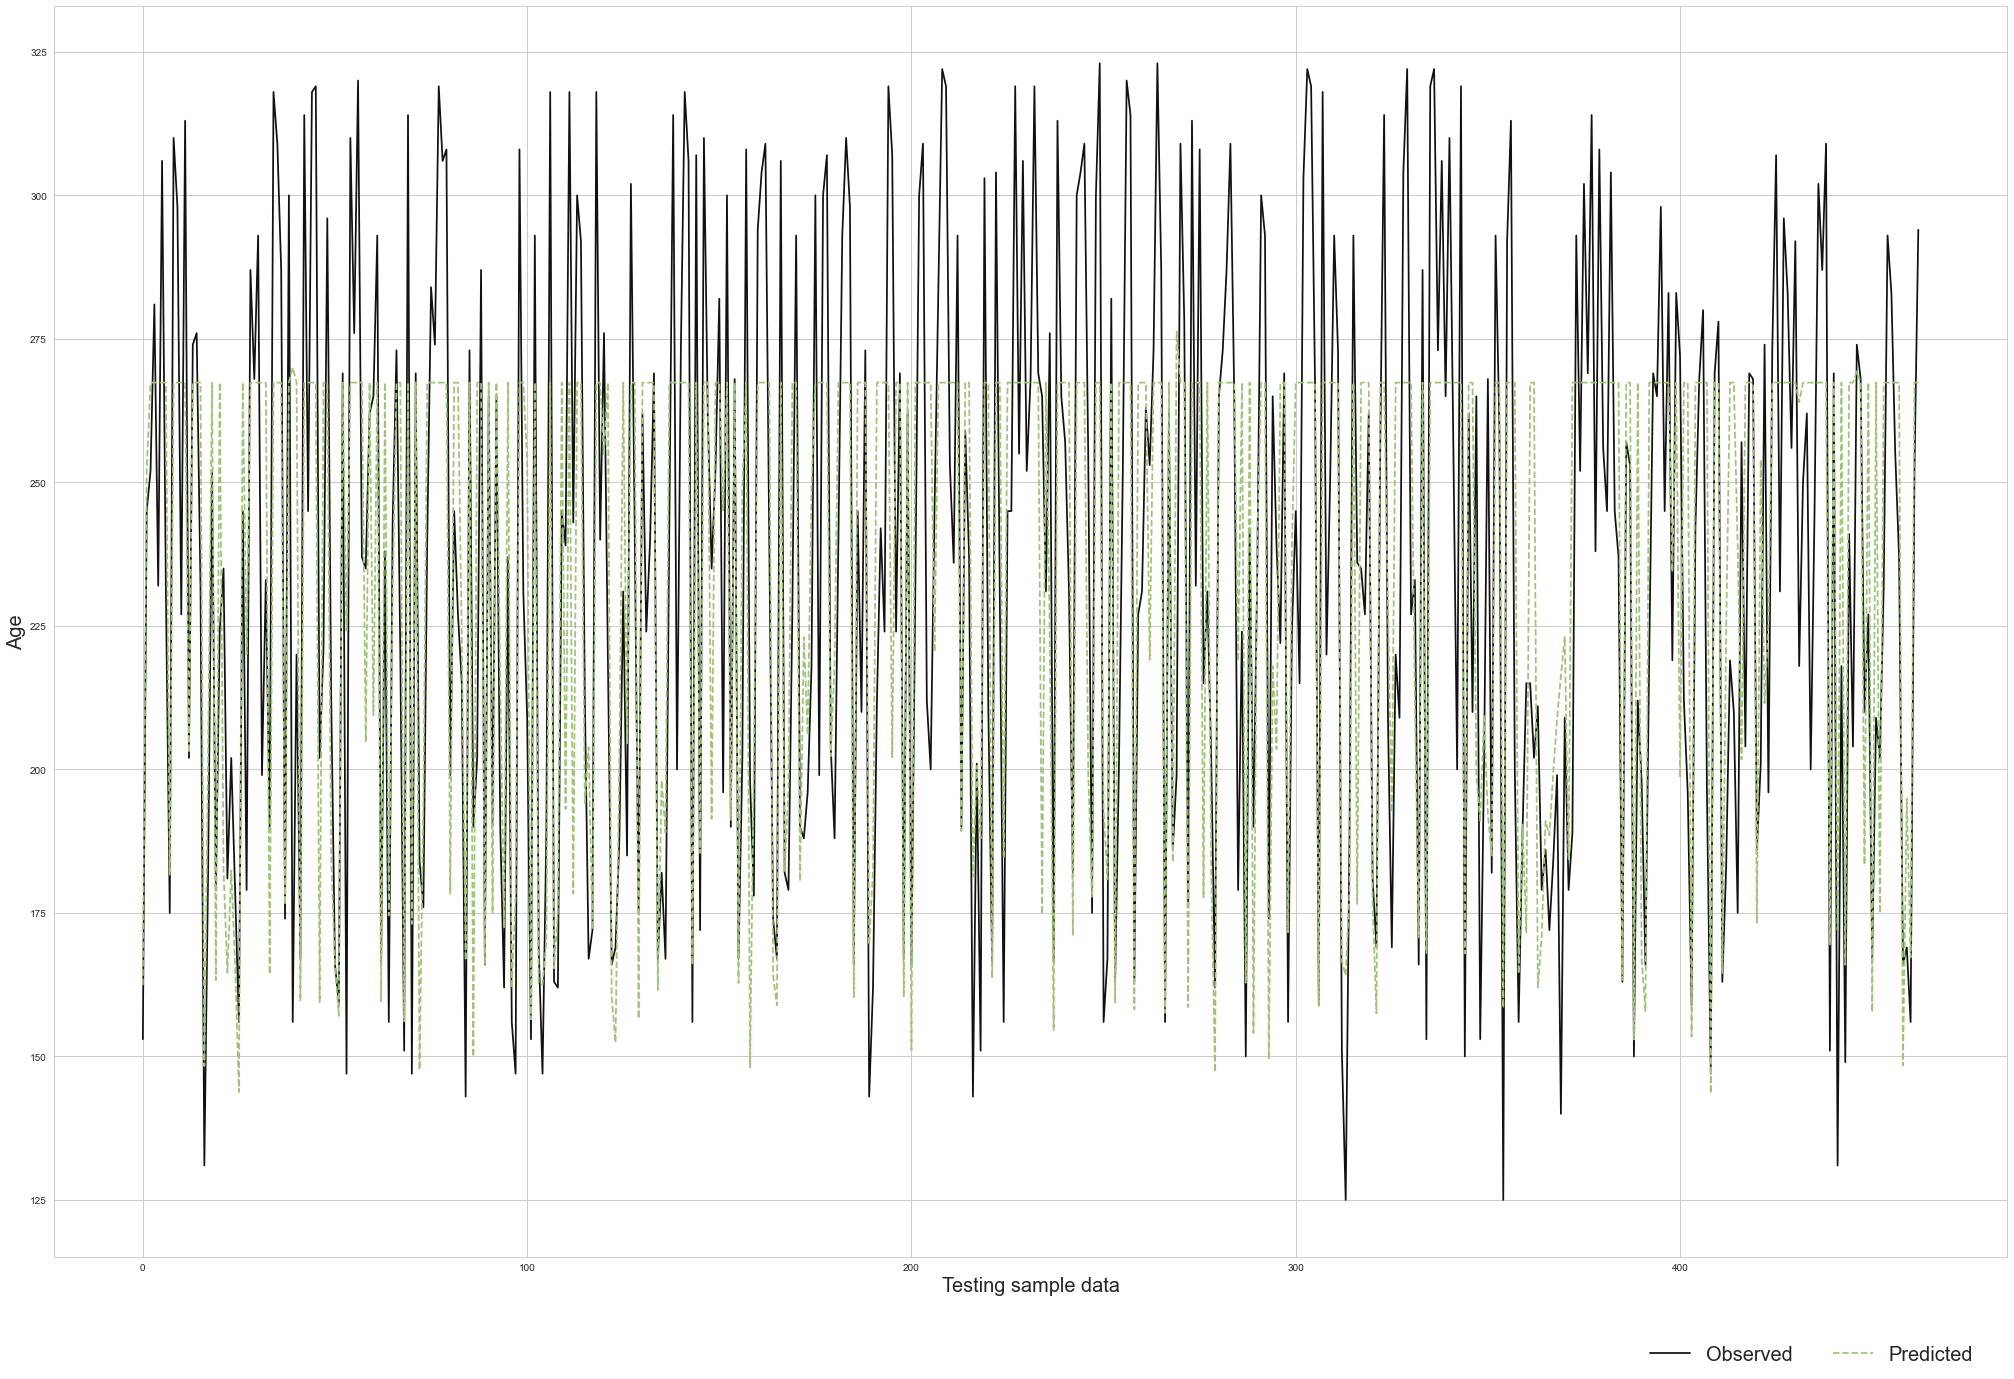

In [34]:
# Plotting the observed and predicted data
import matplotlib.pyplot as plt
#Setting the boundaries and parameters
plt.rcParams['figure.figsize'] = (35,23)
x_ax = range(len(X_test))
# Plotting
plt.plot(x_ax, y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, final_prediction, label = 'Predicted', color = 'g', linestyle = '--')
plt.ylabel('Age', fontsize = "20")
plt.xlabel('Testing sample data', fontsize = "20")
plt.legend(bbox_to_anchor = (0.9, -0.1), loc = 'lower center', fontsize = "20", ncol = 2, frameon = False)

In [27]:
# Plotting the prediction error and residuals using yellowbrick
# Anaconda/Cmd prompt and type: pip install yellowbrick!pip install yellowbrick"

In [28]:
!pip install yellowbrick

/Users/vpanci/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


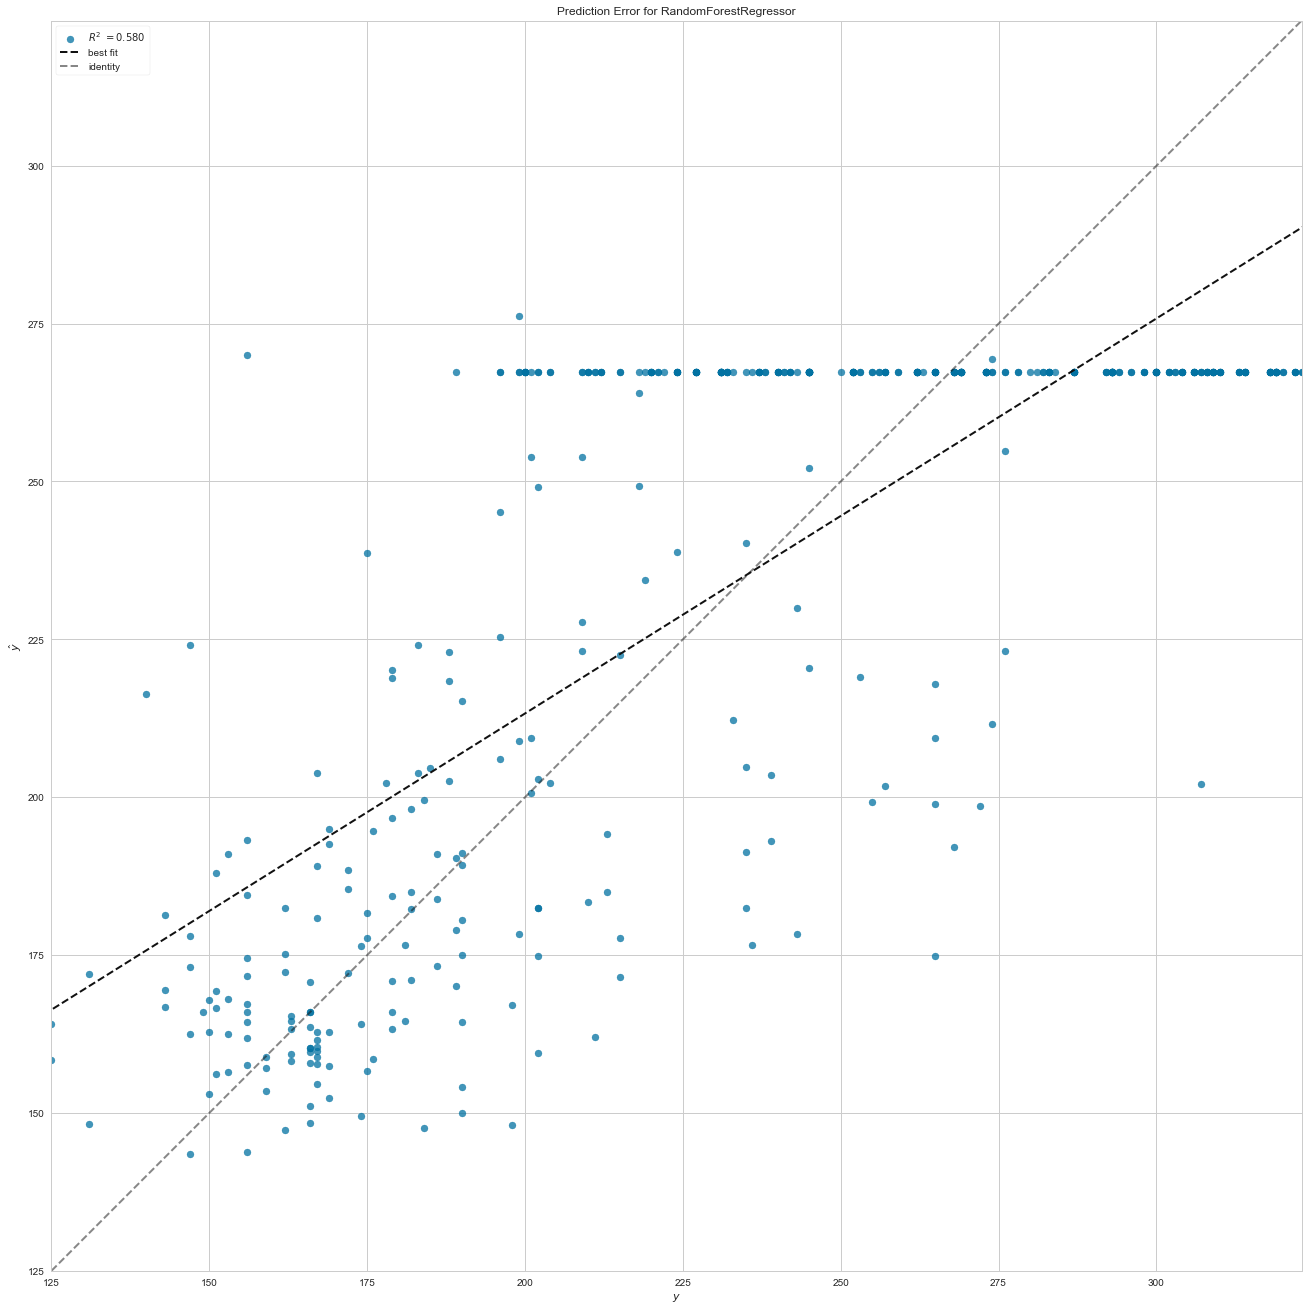

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [35]:
# Plotting the prediction errors
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(final_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

/Users/vpanci/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


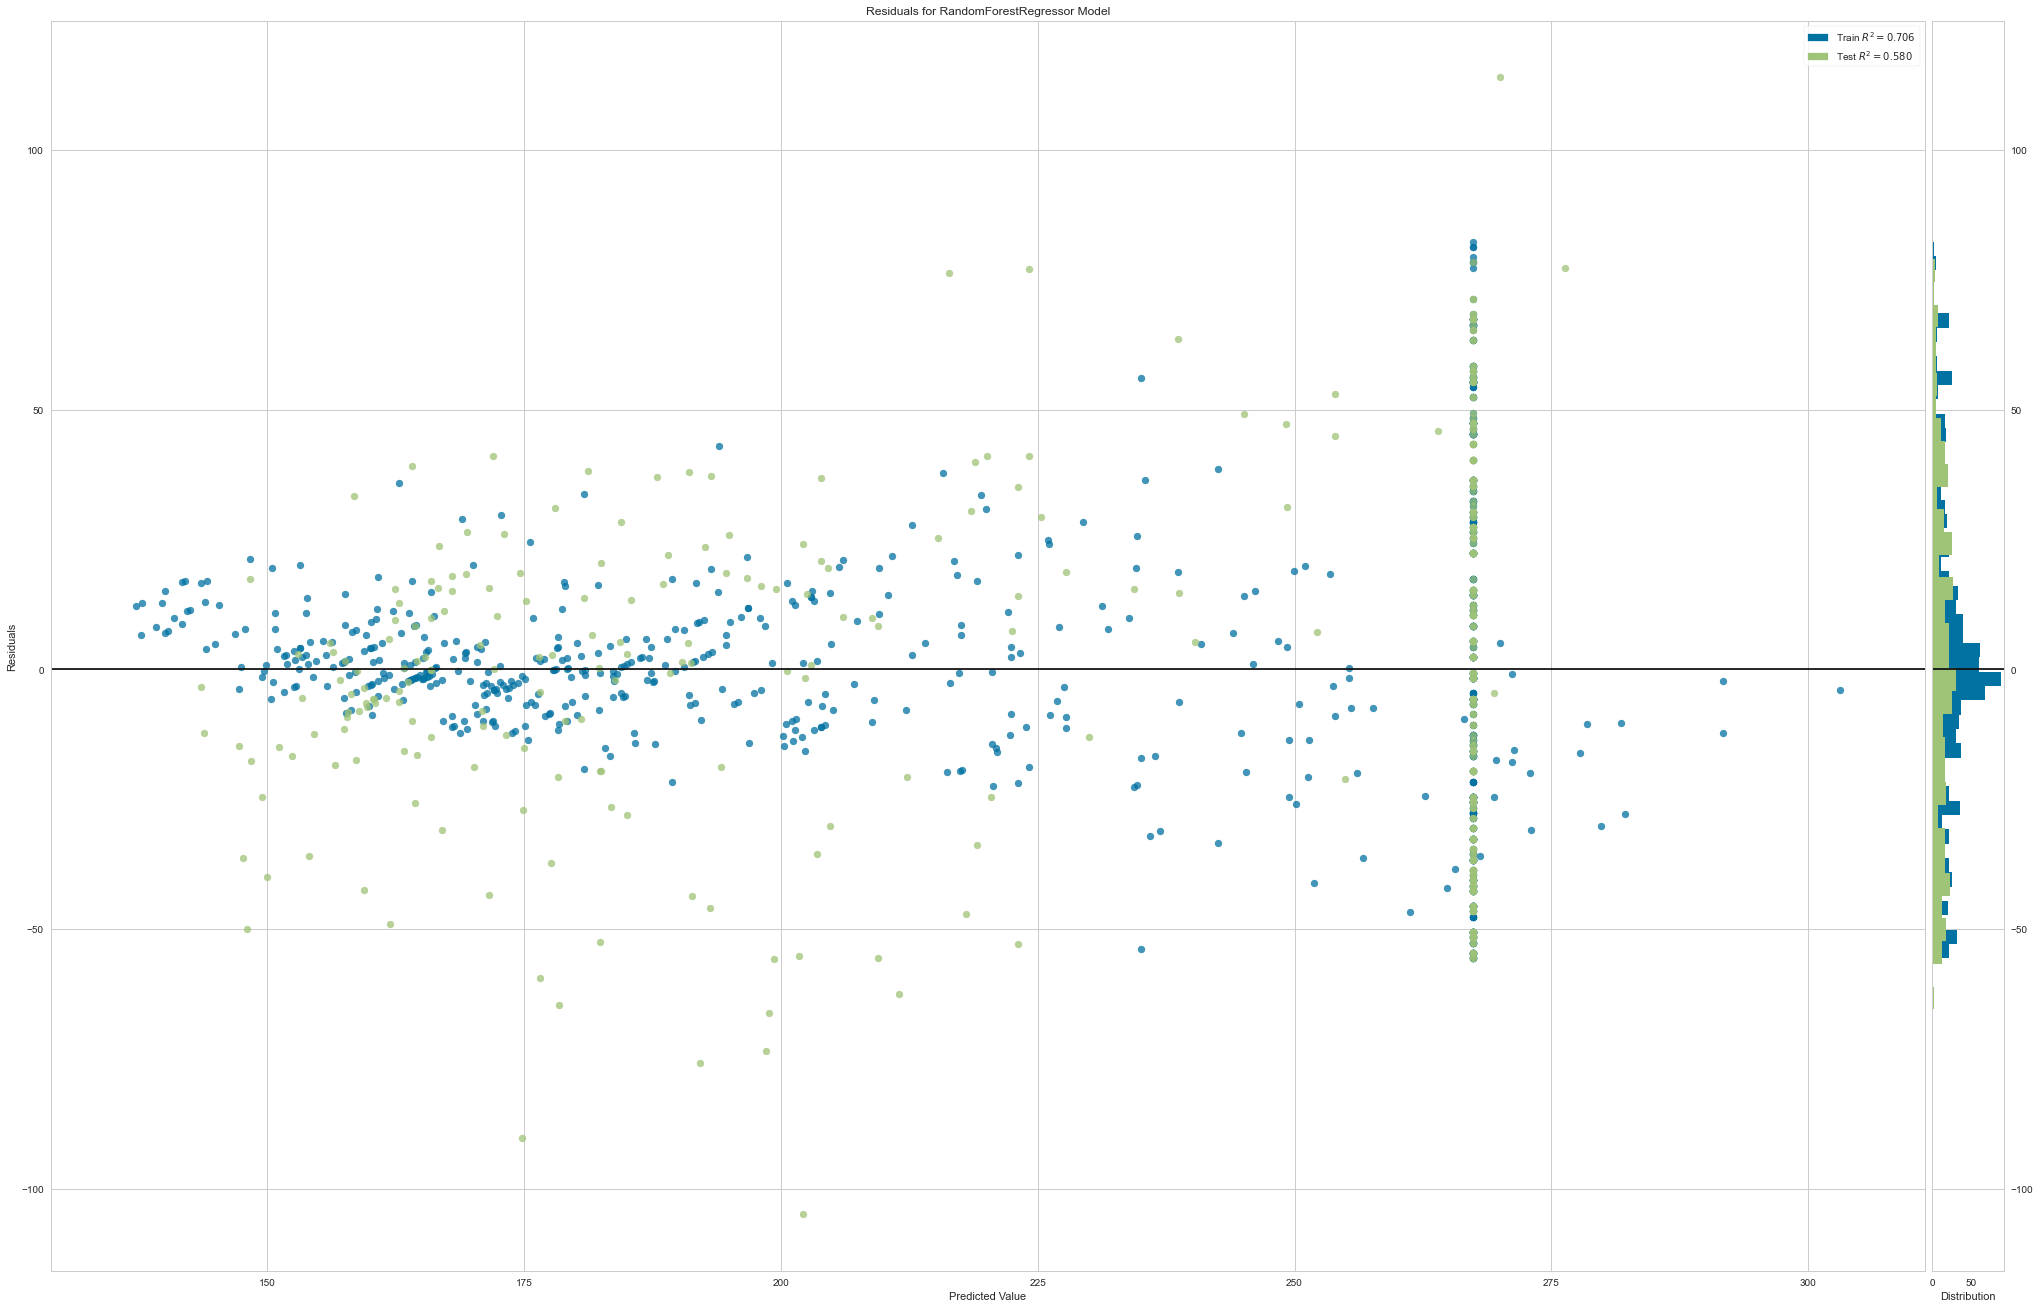

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [36]:
# Plotting the residuals
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(final_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [31]:
from sklearn.pipeline import Pipeline

f_list = list(X.columns)
f_importance = pd.Series(final_model.feature_importances_, index = f_list).sort_values(ascending = False)
print(f_importance)

R_area    0.918286
U_area    0.081714
dtype: float64


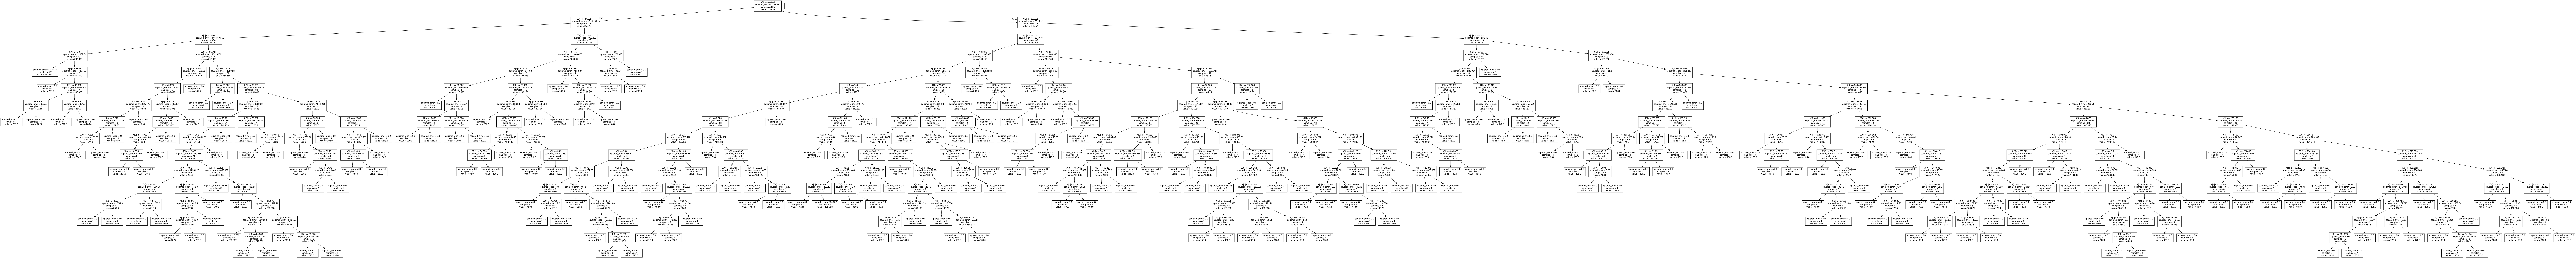

In [32]:
# Visualise the decision trees of the RFR
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import os
!pip install pydotplus
import pydotplus

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\lib\graphviz"
dot_data = StringIO()
export_graphviz(pipe.named_steps['regressor'].estimators_[0], out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

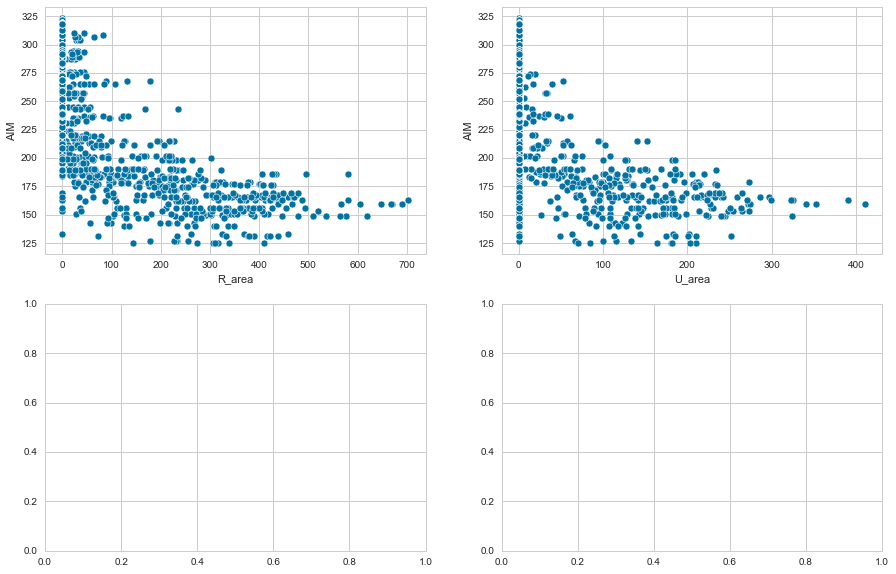

-0.6849922203046438
-0.5394507418483954


In [33]:
# Pearson's correlation

# Pearson's correlation set up
import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams 
import scipy 
from scipy.stats.stats import pearsonr

%matplotlib inline 
rcParams['figure.figsize'] = 8,4
plt.style.use('seaborn-whitegrid')

mydata = pd.read_csv('FPD-area-radiusandulna-aim.csv')
mydata.columns = ['URN', 'R_area', 'U_area', 'AIM']
X = mydata.drop(['URN', 'AIM'], axis = 1)
y = mydata['AIM']
fig,axis = plt.subplots (2,2, figsize = (15,10))
sb.scatterplot (x = 'R_area', y = 'AIM', data = mydata, ax=axis[0,0])
sb.scatterplot (x = 'U_area', y = 'AIM', data = mydata, ax=axis[0,1])
#sb.scatterplot (x = 'Rep_area', y = 'Age_in_months', data = mydata, ax=axis[1,0])
#sb.scatterplot (x = 'Uep_area', y = 'Age_in_months', data = mydata, ax=axis[1,1])
plt.show()

corr1,_ = pearsonr(mydata['AIM'], mydata['R_area'])
corr2,_ = pearsonr(mydata['AIM'], mydata['U_area'])
print(corr1)
print(corr2)